## 4.8 Optional practice

This section suggests further problems, in case you feel you need more practice.
You may not have the time to attempt all these problems.
In the wording of these and future problems, 'implement' implies
documenting, testing and analysing the complexity too.
You should practise measuring the run-times with loops that double the inputs
for at least one problem.
To save time, you may write the problem definition directly
as a function header and docstring.

Like all exercises, you can discuss these freely with your tutor
and in the forums, unless they are part of TMA questions. If you want others to comment on your solution,
then include the word 'solution' in your post's title so that your peers
can avoid seeing solutions until they have attempted the problem themselves.

The problems are from easiest to hardest in my opinion,
but your mileage may vary. I recommend you read the next section (summary) and
the [next chapter](../05_TMA01-1/05-introduction.ipynb#5-TMA-01-part-1) (advice for TMA questions)
before attempting the problems here.

These and all other optional exercises have deliberately no answers in the book.

### 4.8.1 DNA

DNA is the molecule that contains an organism's genetic code.
It consists of two strands (entwined in a double helix) of
the bases adenine, cytosine, guanine and thymine.
Each strand can be modelled as a string with letters A, C, G and T.

#### Exercise 4.8.1

Implement a function that checks if a string models a DNA strand, i.e.
if it only includes some or all of the four uppercase letters.

[Hint](../31_Hints/Hints_04_8_01.ipynb)

### 4.8.2 Minimum

If Python didn't implement the minimum and maximum functions on sequences with
pairwise comparable items, we could do so ourselves.
Alice implements the minimum operation with
a linear search for the smallest item. Bob first sorts the input sequence.

#### Exercise 4.8.2

Implement both approaches for one sequence type of your choice
(string, tuple or list) and explain which one is more efficient.

Function names should state *what* the function does, not *how* it works.
However, when implementing different algorithms for the same problem,
you can name your Python functions to reflect the algorithm, e.g.
`min_with_search` and `min_with_sorting`.

[Hint](../31_Hints/Hints_04_8_02.ipynb)

### 4.8.3 Lexicographic comparison

If Python only supported comparisons of numbers, Booleans and characters,
we'd have to implement lexicographic comparison for sequences.

#### Exercise 4.8.3

Implement the equality comparison for strings.
You can use the comparison operators on single characters.

[Hint](../31_Hints/Hints_04_8_03.ipynb)

### 4.8.4 Palindrome

A palindrome is a text that can be read backwards in the same way as forwards.
The strings 'level' and 'step on no pets' are palindromes.
We assume that the left-to-right and right-to-left texts have to match exactly:
'step on NO pets' isn't a palindrome under this definition.

#### Exercise 4.8.4

Implement a function that decides whether a string is a palindrome.
Don't modify the input string.

[Hint](../31_Hints/Hints_04_8_04.ipynb)

### 4.8.5 Mode

The **mode** is the most frequent item in a sequence.
For example, the mode of 'Hello there' is 'e'.
If several items occur equally frequently then the sequence may have multiple modes,
but let's assume the input sequence has a single mode.

#### Exercise 4.8.5

Implement a function that computes the mode of a string.

[Hint](../31_Hints/Hints_04_8_05.ipynb)

### 4.8.6 Images

Images can be represented as tables, and notebooks support multiple media,
so with a little bit of Python you can generate and manipulate images.

An RGB raster image can be represented as a two-dimensional grid of pixels,
each represented by a triplet of integers from 0 to 255 indicating
the intensity of red, green and blue light. For example, a green pixel
is represented by (0, *g*, 0), with *g* from 1 to 255.
If red, green and blue light have the same intensity, then the resulting colour
is on the grey scale: (0, 0, 0) represents black,
(127, 127, 127) a medium grey and (255, 255, 255) represents white.

To help you manipulate images, I have written some auxiliary code.
All auxiliary code files used in this book are named `m269_...py` and are in
the same `notebooks` folder as the 'root' notebook `M269.ipynb`.
You won't need to open any auxiliary file.

<div class="alert alert-warning">
<strong>Note:</strong> Do <strong>not</strong> modify the auxiliary Python files <code>m269_...</code>
as that may break the notebooks that use them.
</div>

The file `m269_image.py` has some functions and constants to support
some simple image processing:

- `load_image(filename)` creates a grid from the given BMP, PNG or JPEG file
- `save_image(grid, filename)` saves the grid to a BMP, PNG or JPEG file
- `new_image(width, height, colour)` returns a monochromatic grid
- `show_image(grid)` displays the grid in the notebook
- `width(grid)` returns the number of columns (horizontal number of pixels)
- `height(grid)` returns the number of rows (vertical number of pixels).

A grid is a table (list of lists) of RGB triplets (tuples).

<div class="alert alert-info">
<strong>Info:</strong> The functions use the
<a href="https://pillow.readthedocs.io/en/stable/">Python Image Library</a>
and <a href="https://matplotlib.org">matplotlib</a> to load, display and save an image.
</div>

We must load the `notebooks/m269_image.py` file before we can use its functions.
That's done with
the IPython command `%run -i ../m269_test` in the first line of a code cell.
The command executes the code in the given file as if the code were in the cell:
it is similar to an import statement.
The relative path `../` tells IPython that the file is in the
parent folder of (i.e. the folder above) this notebook.
IPython automatically adds the `.py` extension.

Here's how to load and display the M269 cover image.

Image has 498 x 355 pixels.


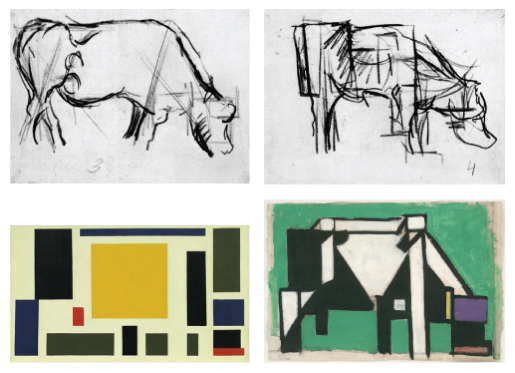

In [1]:
%run -i ../m269_image

cover = load_image("../cover.jpg")
print("Image has", width(cover), "x", height(cover), "pixels.")
show_image(cover)

The grid (table) returned by `load_image` stores the pixels in row order.
The column increases from left to right and
the row increases from top to bottom.
This means that `image[0][0]` (the top left RGB tuple of table `image`)
represents the top left pixel of the image,
and `image[h-1][w-1]` represents the bottom right pixel, where `h` and `w` are
the number of rows (height) and columns (width), respectively.

The `R`, `G` and `B` constants have value 0, 1 and 2 respectively,
so that you can easily access each colour of a pixel. Here's an example.

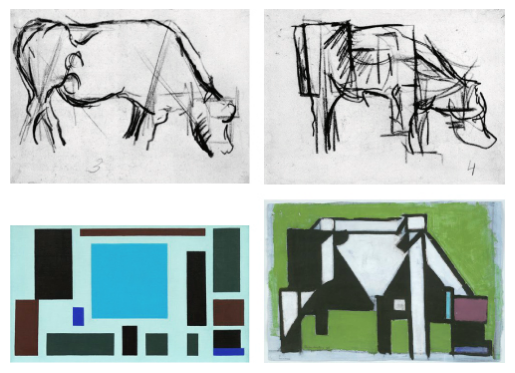

In [2]:
def swap_red_blue(image: list) -> None:
    """Swap red and blue components of each pixel."""
    for column in range(width(image)):
        for row in range(height(image)):
            pixel = image[row][column]
            image[row][column] = (pixel[B], pixel[G], pixel[R])


swap_red_blue(cover)
show_image(cover)

Colours that are a mixture of red and green, like yellow, became
blueish, while those that are a mix of blue and green became brownish.

You can also create an image from scratch.
I've defined constants for the [16 basic colours in HTML 4](https://en.wikipedia.org/wiki/Web_colors#Basic_colors). Here's an example.

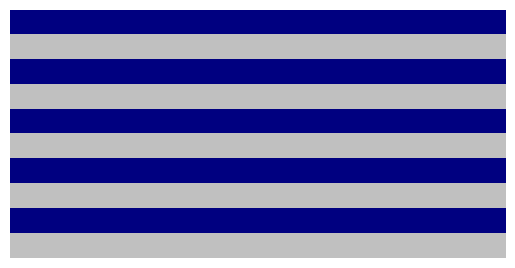

In [3]:
def stripes(n: int, colour1: tuple, colour2: tuple) -> list:
    """Create n pairs of alternating stripes, each 100 x 5 pixels.

    Preconditions: n > 0; colour1 and colour2 are RGB triplets
    Postconditions: the top stripe has colour1
    """
    image = new_image(100, n * 2 * 5, colour2)
    # add 5 rows of colour1 every 10 rows
    for row in range(0, height(image), 10):
        for increment in range(0, 5):
            image[row + increment] = [colour1] * 100
    return image


image = stripes(5, NAVY, SILVER)
show_image(image)

The image is only 100 × 50 pixels, but it's shown larger than the cover image:
`show_image` automatically adapts the display to large and small images.

#### Exercise 4.8.6

Implement this function to transform colour images to greyscale images:

**Operation**: colour to grey\
**Inputs/Outputs**: *image*, an RGB raster image\
**Preconditions**: true\
**Postconditions**: if a pixel is (*r*, *g*, *b*) in pre-*image*, then it is
(*grey*, *grey*, *grey*) in post-*image*,
with *grey* = floor((*r* + *g* + *b*) / 3)

Test the function by applying it to the M269 cover image.

In [4]:
# replace this with your code

⟵ [Previous section](04_7_reverse.ipynb) | [Up](04-introduction.ipynb) | [Next section](04_9_summary.ipynb) ⟶